In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import chisquare
from scipy import stats

## Get to know about the data

In [2]:
# Import the data into Pandas dataframe

df = pd.read_csv("bank-additional-full.csv", sep=';')

In [3]:
# Check the first 5 rows

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Check the number of row and column

df.shape

(41188, 21)

In [5]:
# Check the name and data type of each column

df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
# Check missing values

def num_missing(x):
    return sum(x.isnull())

#Apply per column

print ("Missing values per column:")
print (df.apply(num_missing, axis=0))

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## Change variable names

In [7]:
# Make the variable names more descriptive

df=df.rename(columns = {'housing':'housingLoan'})
df=df.rename(columns = {'loan':'personalLoan'})
df=df.rename(columns = {'contact':'contactMethod'})
df=df.rename(columns = {'month':'lastContact_month'})
df=df.rename(columns = {'day_of_week':'lastContact_day'})
df=df.rename(columns = {'duration':'lastContact_duration'})
df=df.rename(columns = {'campaign':'numberOfContact'})
df=df.rename(columns = {'pdays':'pastCam_daysSince'})
df=df.rename(columns = {'previous':'pastCam_numberOfContact'})
df=df.rename(columns = {'poutcome':'pastCam_result'})
df=df.rename(columns = {'y':'subscribe'})
df=df.rename(columns = {'emp.var.rate':'idx_employment'})
df=df.rename(columns = {'cons.price.idx':'idx_price'})
df=df.rename(columns = {'cons.conf.idx':'idx_confidence'})
df=df.rename(columns = {'euribor3m':'idx_euribor'})
df=df.rename(columns = {'nr.employed':'idx_employeesNum'})

## Look into each variable and wrangle the data

### 1. subscribe (response variable)

In [8]:
# Check the distribution of values 

df.subscribe.value_counts()

no     36548
yes     4640
Name: subscribe, dtype: int64

* The variable subscribe doesn't have any missing nor illogical values

In [9]:
# Transform the level names for easier processing

df['subscribe'] = df['subscribe'].map({'yes': 1, 'no': 0})

### 2. age

In [10]:
# Check the distribution of values 

df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

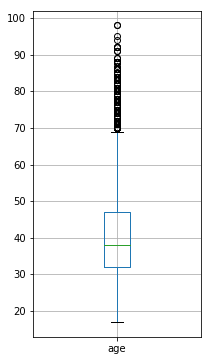

In [11]:
# Plot the distribution of values 

fig = plt.figure(1, figsize=(3, 6))
df.boxplot(column="age")
plt.show()

* The variable age doesn't have any missing nor illogical values ranging from 17 to 98

### 3. job

In [12]:
# Check the distribution of values 

df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

* There are 'unknown' levels in the variable job. 
* To decide whether to leave unknown as is or replace with other value, we ran chi-square test of independence to see whether the two variables, job and subscribe (response variable), are independent for the level 'unknown' and the rest of levels.

In [13]:
# Create a dataframe with two variables 

df_job = df[['subscribe', 'job']]

# Change the level name

df_job.loc[df_job.job != 'unknown', 'job'] = 'known'

# Create a crosstab 

observed_job = pd.crosstab(df_job.subscribe, df_job.job, margins=False)
observed_job

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


job,known,unknown
subscribe,,
0,36255,293
1,4603,37


In [14]:
# Run chi-square test 

stats.chi2_contingency(observed_job) 

# The output below shows the chi-square statistic, the p-value and the degrees of freedom 
# followed by the expected counts

(0.0032104107038062905,
 0.95481565081367703,
 1,
 array([[ 36255.17587647,    292.82412353],
        [  4602.82412353,     37.17587647]]))

- Given the high p-value, the test result does not detect a significant relationship between the variables.
- It means that there is no specific pattern in missingness (unknown)
- Therefore, we imputed the unknown with the mode.

In [15]:
# Replace unknown with mode

df.loc[df.job == 'unknown', 'job'] = 'admin.'

### 4. marital

In [16]:
# Check the distribution of values 

df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

- There are 'unknown' levels in the variable job.
- To decide whether to leave unknown as is or replace with other value, we ran chi-square test of independence

In [17]:
# Create a dataframe with two variables 

df_marital = df[['subscribe', 'marital']]

# Change the level name

df_marital.loc[df_marital.marital != 'unknown', 'marital'] = 'known'

# Create a crosstab 

observed_marital = pd.crosstab(df_marital.subscribe, df_marital.marital, margins=False)
observed_marital

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


marital,known,unknown
subscribe,,
0,36480,68
1,4628,12


In [18]:
# Run chi-square test 

stats.chi2_contingency(observed_marital) 

# The output below shows the chi-square statistic, the p-value and the degrees of freedom 
# followed by the expected counts

(0.77535114047986342,
 0.37856670795812708,
 1,
 array([[  3.64770123e+04,   7.09876663e+01],
        [  4.63098767e+03,   9.01233369e+00]]))

- Given the high p-value, the test result does not detect a significant relationship between the variables.
- It means that there is no specific pattern in missingness (unknown)
- Therefore, we imputed the unknown with the mode.

In [19]:
# Replace unknown with mode

df.loc[df.marital == 'unknown', 'marital'] = 'married'

### 5. education

In [20]:
# Check the distribution of values 

df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

- There are 'unknown' levels in the variable job.
- To decide whether to leave unknown as is or replace with other value, we ran chi-square test of independence

In [21]:
# Create a dataframe with two variables 

df_education = df[['subscribe', 'education']]

# Change the level name

df_education.loc[df_education.education != 'unknown', 'education'] = 'known'

# Create a crosstab 

observed_education = pd.crosstab(df_education.subscribe, df_education.education, margins=False)
observed_education

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


education,known,unknown
subscribe,,
0,35068,1480
1,4389,251


In [22]:
# Run chi-square test 

stats.chi2_contingency(observed_education) 

# The output below shows the chi-square statistic, the p-value and the degrees of freedom 
# followed by the expected counts

(18.579197631494843,
 1.6298947683080677e-05,
 1,
 array([[ 35012.0043702,   1535.9956298],
        [  4444.9956298,    195.0043702]]))

- Given the low p-value (<0.01), the test result demonstrates a significant relationship between the variables.
- It means that there is specific pattern in missingness (unknown)
- Therefore, we decided to maintain the unknown level

### 6. default

In [23]:
# Check the distribution of values 

df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

- There are 'unknown' levels in the variable job.
- To decide whether to leave unknown as is or replace with other value, we ran chi-square test of independence

In [24]:
# Create a dataframe with two variables 

df_default = df[['subscribe', 'default']]

# Change the level name

df_default.loc[df_default.default != 'unknown', 'default'] = 'known'

# Create a crosstab 

observed_default = pd.crosstab(df_default.subscribe, df_default.default, margins=False)
observed_default

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


default,known,unknown
subscribe,,
0,28394,8154
1,4197,443


In [25]:
# Run chi-square test 

stats.chi2_contingency(observed_default) 

# The output below shows the chi-square statistic, the p-value and the degrees of freedom 
# followed by the expected counts

(405.30737395058429,
 3.8512776525099627e-90,
 1,
 array([[ 28919.4879091,   7628.5120909],
        [  3671.5120909,    968.4879091]]))

- Given the low p-value (<0.01), the test result demonstrates a significant relationship between the variables.
- It means that there is specific pattern in missingness (unknown)
- Therefore, we decided to maintain the unknown level

### 7. housingLoan

In [26]:
# Check the distribution of values 

df.housingLoan.value_counts()

yes        21576
no         18622
unknown      990
Name: housingLoan, dtype: int64

- There are 'unknown' levels in the variable job.
- To decide whether to leave unknown as is or replace with other value, we ran chi-square test of independence

In [27]:
# Create a dataframe with two variables 

df_housingLoan = df[['subscribe', 'housingLoan']]

# Change the level name

df_housingLoan.loc[df_housingLoan.housingLoan != 'unknown', 'housingLoan'] = 'known'

# Create a crosstab 

observed_housingLoan = pd.crosstab(df_housingLoan.subscribe, df_housingLoan.housingLoan, margins=False)
observed_housingLoan

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


housingLoan,known,unknown
subscribe,,
0,35665,883
1,4533,107


In [28]:
# Run chi-square test 

stats.chi2_contingency(observed_housingLoan) 

# The output below shows the chi-square statistic, the p-value and the degrees of freedom 
# followed by the expected counts

(0.16795381809777024,
 0.68193675355130423,
 1,
 array([[ 35669.52762941,    878.47237059],
        [  4528.47237059,    111.52762941]]))

- Given the high p-value, the test result does not detect a significant relationship between the variables.
- It means that there is no specific pattern in missingness (unknown)
- Therefore, we imputed the unknown with the mode.

In [29]:
# Replace unknown with mode

df.loc[df.housingLoan == 'unknown', 'housingLoan'] = 'yes'

### 8. personalLoan

In [30]:
# Check the distribution of values 

df.personalLoan.value_counts()

no         33950
yes         6248
unknown      990
Name: personalLoan, dtype: int64

- There are 'unknown' levels in the variable job.
- To decide whether to leave unknown as is or replace with other value, we ran chi-square test of independence

In [31]:
# Create a dataframe with two variables 

df_loan = df[['subscribe', 'personalLoan']]

# Change the level name

df_loan.loc[df_loan.personalLoan != 'unknown', 'personalLoan'] = 'known'

# Create a crosstab 

observed_loan = pd.crosstab(df_loan.subscribe, df_loan.personalLoan, margins=False)
observed_loan

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


personalLoan,known,unknown
subscribe,,
0,35665,883
1,4533,107


In [32]:
# Run chi-square test 

stats.chi2_contingency(observed_loan) 

# The output below shows the chi-square statistic, the p-value and the degrees of freedom 
# followed by the expected counts

(0.16795381809777024,
 0.68193675355130423,
 1,
 array([[ 35669.52762941,    878.47237059],
        [  4528.47237059,    111.52762941]]))

- Given the high p-value, the test result does not detect a significant relationship between the variables.
- It means that there is no specific pattern in missingness (unknown)
- Therefore, we imputed the unknown with the mode.

In [33]:
# Replace unknown with mode

df.loc[df.personalLoan == 'unknown', 'personalLoan'] = 'no'

### 9. contactMethod

In [34]:
# Check the distribution of values 

df.contactMethod.value_counts()

cellular     26144
telephone    15044
Name: contactMethod, dtype: int64

- The variable contactMethod doesn't have any missing nor illogical level.

### 10. lastContact_month

In [35]:
# Check the distribution of values 

df.lastContact_month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: lastContact_month, dtype: int64

- The variable lastContact_month doesn't have any missing nor illogical level.

### 11. lastContact_day

In [36]:
# Check the distribution of values 

df.lastContact_day.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: lastContact_day, dtype: int64

In [1]:
plt.bar()

NameError: name 'plt' is not defined

- The variable lastContact_month doesn't have any missing nor illogical level.

### 12. lastContact_duration

In [37]:
# Check the distribution of values 

df.lastContact_duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: lastContact_duration, dtype: float64

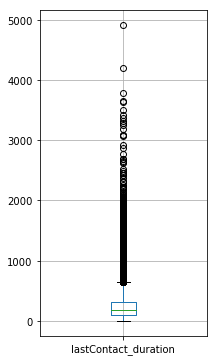

In [38]:
# Plot the distribution of values 

fig = plt.figure(1, figsize=(3, 6))
df.boxplot(column="lastContact_duration")
plt.show()

### 13. numberOfContact 

In [39]:
# Check the distribution of values 

df.numberOfContact.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: numberOfContact, dtype: float64

In [40]:
# Check the distribution of values 

df.numberOfContact.value_counts().head(10)

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
Name: numberOfContact, dtype: int64

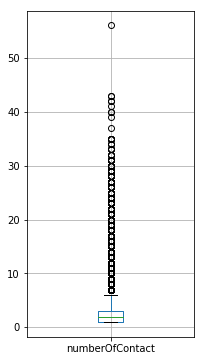

In [41]:
# Plot the distribution of values 

fig = plt.figure(1, figsize=(3, 6))
df.boxplot(column="numberOfContact")
plt.show()

### 14. pastCam_daysSince

In [42]:
# Check the distribution of values 

df.pastCam_daysSince.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pastCam_daysSince, dtype: float64

In [43]:
# Check the distribution of values 

df.pastCam_daysSince.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pastCam_daysSince, dtype: int64

### 15. pastCam_numberOfContact

In [44]:
# Check the distribution of values 

df.pastCam_numberOfContact.describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: pastCam_numberOfContact, dtype: float64

In [45]:
# Check the distribution of values 

df.pastCam_numberOfContact.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: pastCam_numberOfContact, dtype: int64

### 16. pastCam_result

In [46]:
# Check the distribution of values 

df.pastCam_result.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: pastCam_result, dtype: int64

- The variable pastCam_result doesn't have any missing nor illogical values

### 17. idx_employment

In [47]:
# Check the distribution of values 

df.idx_employment.describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: idx_employment, dtype: float64

- The variable idx_employment doesn't have any missing nor illogical values ranging from 0.08 to 1.4

### 18. idx_price

In [48]:
# Check the distribution of values 

df.idx_price.describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: idx_price, dtype: float64

- The variable idx_confidence doesn't have any missing nor illogical values ranging from 93.58 to 94.77

### 19. idx_confidence

In [49]:
# Check the distribution of values 

df.idx_confidence.describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: idx_confidence, dtype: float64

- The variable idx_confidence doesn't have any missing nor illogical values ranging from -50.8 to -26.9

### 20. idx_euribor

In [50]:
# Check the distribution of values 

df.idx_euribor.describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: idx_euribor, dtype: float64

- The variable idx_euribor doesn't have any missing nor illogical values ranging from 0.63 to 5.04

### 21. idx_employeesNum

In [51]:
# Check the distribution of values 

df.idx_employeesNum.describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: idx_employeesNum, dtype: float64

- The variable idx_employeesNum doesn't have any missing nor illogical values ranging from 4963.6 to 5228

## Export and import wrangled data

In [142]:
# Save the dataframe into a pickle file

pickle.dump( df, open( "df_new.pickle", "wb" ) )

In [ ]:
# Load the dataframe back from the pickle file.

df_new = pickle.load( open( "df_new.pickle", "rb" ) )